## COM361 &mdash; Introdução à Otimização &mdash; 2023, Prof. Amit Bhaya ##

# Descobrindo equações governantes a partir de dados por identificação esparsa de sistemas dinâmicos não lineares. #

#### Leonardo Soares da Costa Tanaka (leonardo.tanaka@poli.ufrj.br), Lincoln Rodrigues Proença (lincoln22220@poli.ufrj.br )

*****

### Índice

1. [Introdução](#1.-Introdução)
1. [Modelo Matemático - Sparse Identification of Nonlinear Dynamics (SINDy)](#1.-Modelo_matemático)
1. [Solução](#3.-Solução)
1. [Resultados e Discussão](#4.-Resultados-e-discussão)
  1. [Subseção Opcional](#4.A.-Acrescente-subseções-se-necessário)
1. [Conclusão](#5.-Conclusão)
1. [Referências bibliográficas](#6.-Referências_bibliográficas)

## 1. Introdução ##

**Introdução**

A análise e compreensão de sistemas dinâmicos são fundamentais em diversos campos científicos e tecnológicos. A capacidade de extrair leis matemáticas subjacentes a dados observacionais é crucial para modelar e prever comportamentos complexos. Uma abordagem inovadora para alcançar essa compreensão é apresentada no artigo "Discovering governing equations from data by sparse identification of nonlinear dynamical systems" (Descobrindo equações governantes a partir de dados pela identificação esparsa de sistemas dinâmicos não lineares).

<p align="center">
  <img src="img/artigo.png" alt="Artigo científico"/>
</p>
<p align="center">
  Figura 1: Artigo científico utilizado para o trabalho
</p>

Este trabalho de conclusão da disciplina de Introdução à Otimização tem como objetivo explorar a formulação matemática proposta no referido artigo para realizar a identificação esparsa de sistemas dinâmicos não lineares, uma técnica conhecida como SINDy (Sparse Identification of Nonlinear Dynamics). Para implementar esta abordagem, optou-se pela linguagem de programação Julia, reconhecida por sua eficiência em computação científica.

<p align="center">
  <img src="img/SINDy.jpeg" alt="SINDy"/>
</p>
<p align="center">
  Figura 2: SINDy (Sparse Identification of Nonlinear Dynamics)
</p>

O processo de implementação e teste foi conduzido utilizando sistemas dinâmicos destacados no artigo original e em seu apêndice, proporcionando uma validação prática da metodologia proposta. A aplicação da técnica SINDy em conjunção com a linguagem Julia visa não apenas compreender os sistemas dinâmicos estudados, mas também fornecer uma plataforma versátil para futuras investigações e aplicações em diferentes domínios.

<p align="center">
  <img src="img/exemplo-sistema.jpeg" alt="Exemplo"/>
</p>
<p align="center">
  Figura 3: Exemplo de sistema dinâmico que pode ser identificado
</p>

Ao longo deste trabalho, exploraremos os fundamentos teóricos do SINDy, discutiremos a formulação matemática subjacente e apresentaremos os detalhes da implementação em Julia. Além disso, compartilharemos os resultados obtidos ao testar a metodologia em sistemas dinâmicos específicos, destacando as contribuições e limitações identificadas durante o processo.

**Contribuições Adicionais:**
- **Regressão com Regularização:** Uma análise mais aprofundada será realizada através da aplicação de uma regressão de mínimos quadrados no sistema, com regularização para promover a esparsidade ($L_1$).
- **Abordagem Prática:** Este estudo não apenas visa contribuir para o avanço teórico, mas também busca aplicar de maneira prática os conhecimentos adquiridos ao longo da disciplina.

**Contextualização Adicional:**
- **Desafios na Identificação de Equações Governantes a partir de Dados:** O artigo destaca a complexidade em extrair equações governantes a partir de dados, especialmente em campos como ciências climáticas, neurociência, ecologia, finanças e epidemiologia. A abundância de dados contrasta com a dificuldade na formulação de modelos precisos.
- **Combinação de Técnicas Esparsas e Aprendizado de Máquina:** O trabalho propõe a combinação de técnicas que promovem a esparsidade com aprendizado de máquina em sistemas dinâmicos não lineares para descobrir equações governantes a partir de dados de medição ruidosos.

**Paralelo com Descobertas Anteriores:**
- **Analogia com Kepler e Newton:** A analogia com as descobertas de Kepler e Newton destaca a importância de não apenas identificar padrões atratores, mas também compreender as relações dinâmicas fundamentais subjacentes. O método proposto assemelha-se à abordagem de Newton, buscando descobrir dinâmicas subjacentes para extrapolação além dos pontos de amostragem.

**Desenvolvimentos na Área:**
- **Avanços em Aprendizado de Máquina e Ciência de Dados:** Enquanto avanços em aprendizado de máquina e ciência de dados têm prometido revolucionar a análise de dados complexos, a capacidade de extrair modelos físicos de processos dinâmicos tem progredido lentamente. A metodologia proposta busca preencher essa lacuna, proporcionando modelos parsimoniosos que equilibram precisão com complexidade para evitar overfitting.

**Referências Adicionais:**
- **Abordagens Alternativas:** Além do método SINDy, o artigo destaca outras abordagens, como a regressão simbólica e revisa várias técnicas para a descoberta de sistemas dinâmicos, oferecendo uma visão abrangente do estado atual da pesquisa nesse campo.

Em última análise, este estudo visa contribuir para o avanço da compreensão e modelagem de sistemas dinâmicos complexos, destacando a aplicação prática da identificação esparsa de equações governantes a partir de dados, conforme proposto pelo SINDy. Além disso, coloca em prática conhecimentos adquiridos ao decorrer da disciplina realizando uma regressão de mínimos quadrados no sistema com regularização de promoção de esparsidade ($L_1$).


## 2. Modelo matemático - Sparse Identification of Nonlinear Dynamics (SINDy) ##

Sparse Identification of Nonlinear Dynamics (SINDy) é um método que busca identificar as equações que descrevem o comportamento de um sistema dinâmico complexo a partir de dados observados. Essa abordagem explora a esparsidade, ou seja, o fato de que em muitos sistemas complexos, apenas algumas variáveis são verdadeiramente importantes para descrever o comportamento global do sistema. SINDy utiliza técnicas de regularização e seleção de características para extrair essas variáveis importantes e construir uma representação matemática simplificada do sistema.

Aqui, consideramos sistemas dinâmicos na forma:

$$
\begin{equation*}
\dot{\mathbf{x}} = \frac{d}{dt}\mathbf{x}(t) = \mathbf{f}(\mathbf{x}(t))
\end{equation*}
$$

O vetor $x(t) \in \mathbb{R}^n$ denota o estado de um sistema no tempo $t$, e a função $f(x(t))$ representa as restrições dinâmicas que definem as equações de movimento do sistema, como a segunda lei de Newton.

Para determinar a função $f$ a partir de dados, coletamos um histórico temporal do estado $x(t)$ e medimos a derivada $\dot{x}(t)$ ou a aproximamos numericamente a partir de $x(t)$. Os dados são amostrados em vários momentos $t_1, t_2, \ldots, t_m$ e organizados em duas matrizes:

$$
\begin{equation*}
\mathbf{X} = \begin{bmatrix}
\mathbf{x}^T(t_1) \\ \mathbf{x}^T(t_2) \\ \vdots \\ \mathbf{x}^T(t_m)
\end{bmatrix} =
\begin{bmatrix}
x_1(t_1) & x_2(t_1) & \cdots & x_n(t_1) \\
x_1(t_2) & x_2(t_2) & \cdots & x_n(t_2) \\
\vdots   & \vdots   & \ddots & \vdots \\
x_1(t_m) & x_2(t_m) & \cdots & x_n(t_m)
\end{bmatrix}
\end{equation*}
$$

$$
\begin{equation*}
\dot{\mathbf{X}} = \begin{bmatrix}
\dot{\mathbf{x}}^T(t_1) \\ \dot{\mathbf{x}}^T(t_2) \\ \vdots \\ \dot{\mathbf{x}}^T(t_m)
\end{bmatrix} =
\begin{bmatrix}
\dot{x}_1(t_1) & \dot{x}_2(t_1) & \cdots & \dot{x}_n(t_1) \\
\dot{x}_1(t_2) & \dot{x}_2(t_2) & \cdots & \dot{x}_n(t_2) \\
\vdots   & \vdots   & \ddots & \vdots \\
\dot{x}_1(t_m) & \dot{x}_2(t_m) & \cdots & \dot{x}_n(t_m)
\end{bmatrix}
\end{equation*}
$$

Em seguida, construímos uma biblioteca $\Theta(\mathbf{X})$ composta por funções não lineares candidatas das colunas de $\mathbf{X}$. Por exemplo, $\Theta(\mathbf{X})$ pode consistir em termos constantes, polinomiais e trigonométricos:

$$
\begin{equation}
\bf{\Theta}(\bf{X}) = \begin{bmatrix}
\vdots & \vdots & \vdots & \vdots & & \vdots & \vdots & \\
1 & \bf{X} & \bf{X}^2 & \bf{X}^3 & \cdots & \sin(\bf{X}) & \cos(\bf{X}) & \cdots\\
\vdots & \vdots & \vdots & \vdots & & \vdots & \vdots &
\end{bmatrix}
\end{equation}
$$

Para os exemplos usados, os dados são coletados para o sistema e empilhados em duas grandes matrizes de dados $\mathbf{X}$ e $\dot{\mathbf{X}}$, onde cada linha de $\mathbf{X}$ é um instantâneo do estado $x$ no tempo, e cada linha de $\dot{\mathbf{X}}$
é um instantâneo da derivada temporal do estado $\dot{x}$ no tempo. Aqui, a dinâmica do lado direito é identificada no espaço de polinômios $\Theta(\mathbf{X})$ em $(x, y, z)$ até a quinta ordem, embora outras funções como $\sin$, $\cos$, $\exp$, ou polinômios de ordem superior possam ser incluídas.

$$
\begin{equation}
\Theta(\mathbf{X}) = \begin{bmatrix}
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
x(t) &
y(t) &
z(t) &
x(t)^2 &
x(t)y(t) &
\dots &
z(t)^5 \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots
\end{bmatrix}
\end{equation}
$$

O número de possíveis estruturas de modelo a partir desta biblioteca é combinatoriamente alto. $\textbf{f}(\textbf{x}(t))$ é então substituído por $\bf{\Theta}(\bf{X})$ e um vetor de coeficientes $\bf{\Xi}=\left[\bf{\xi}_1 \bf{\xi}_2 \cdots \bf{\xi}_n \right]$ determinando os termos ativos em $\textbf{f}(\textbf{x}(t))$:

$$
\dot{\bf{X}}=\bf{\Theta}(\bf{X})\bf{\Xi}
$$

Porque apenas alguns termos são esperados para serem ativos em cada ponto no tempo, assume-se que $\textbf{f}(\textbf{x}(t))$ admite uma representação esparsa em $\bf{\Theta}(\bf{X})$. Isso se torna então um problema de otimização em encontrar um $\bf{\Xi}$ esparsa que incorpora de forma ótima $\dot{\textbf{X}}$. Em outras palavras, um modelo é obtido realizando uma regressão de mínimos quadrados no sistema  com regularização de promoção de esparsidade ($L_1$).

$$
\bf{\xi}_k=\underset{\bf{\xi}'_k}{\arg\min}\left|\left|\dot{\bf{X}}_k-\bf{\Theta}(\bf{X})\bf{\xi}'_k\right|\right|_2 +\lambda \left|\left|\bf{\xi}'_k\right|\right|_1
$$

onde $\lambda$ é um parâmetro de regularização. Finalmente, o conjunto esparsa de $\bf{\xi}_k$ pode ser usado para reconstruir o sistema dinâmico:

$$
\dot{x}_k=\bf{\Theta}(\bf{x})\bf{\xi}_k
$$



## 3. Solução ##

### 3.1. Sistema Verdadeiro de Lorenz

#### 3.1.1. Definindo o Sistema
Inicialmente, é necessário definir o Sistema de Lorenz e gerar os pontos que serão posteriormente utilizados para o problema de otimização.

O Sistema de Lorenz é modelado pelas seguintes equações diferenciais ordinárias (EDOs):

$$
\begin{align*}
\frac{dx}{dt} &= \sigma(y - x) \\
\frac{dy}{dt} &= x(\rho - z) - y \\
\frac{dz}{dt} &= xy - \beta z \\
\end{align*}
$$

Essas equações descrevem a evolução temporal das variáveis $x$, $y$, e $z$, onde $\sigma$, $\rho$, e $\beta$ são parâmetros conhecidos do sistema. Essencialmente, o Sistema de Lorenz é um exemplo clássico de um sistema dinâmico não linear, conhecido por exibir comportamento caótico. A solução dessas equações representa a trajetória no espaço tridimensional ao longo do tempo.

┌ Warning: To maintain consistency with solution indexing, keyword argument vars will be removed in a future version. Please use keyword argument idxs instead.
│   caller = ip:0x0
└ @ Core :-1


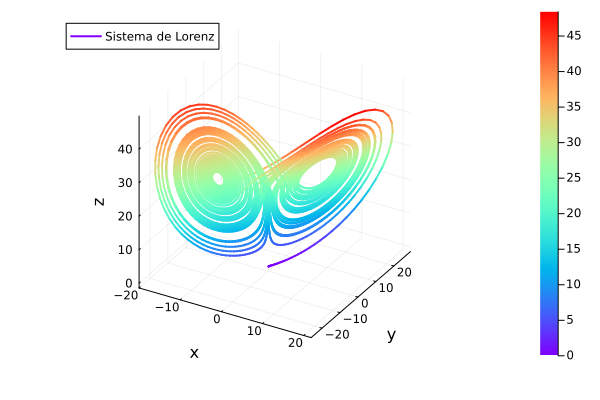

In [2]:
# Importa as bibliotecas necessárias
using DifferentialEquations
using Plots

# Define a função que representa as equações diferenciais do Sistema de Lorenz
function lorenz!(du, u, p, t)
    σ, ρ, β = p
    du[1] = σ * (u[2] - u[1])
    du[2] = u[1] * (ρ - u[3]) - u[2]
    du[3] = u[1] * u[2] - β * u[3]
end

# Condições iniciais e parâmetros comuns para o Sistema de Lorenz
u0 = [0.1, 0.0, 0.0]
p = [10.0, 28.0, 8/3]

# Intervalo de tempo
tspan = (0.0, 60.0) 

# Resolve as equações diferenciais
prob = ODEProblem(lorenz!, u0, tspan, p)
sol_lorenz = solve(prob, Tsit5(), saveat=0.01)  # Reduz o número de pontos de dados

# Cria um array para a coordenada z ao longo do tempo
line_z = sol_lorenz[3, :]

# Plota os resultados com um gradiente de cores do tipo rainbow
plot_obj = plot(sol_lorenz, vars=(1, 2, 3), xlabel="x", ylabel="y", zlabel="z", label="Sistema de Lorenz",
     linewidth=2, linecolor=:auto, color=:rainbow1, line_z=line_z)
display(plot_obj)


#### 3.1.2. Definindo o Modelo

Posteriormente, é necessário definir as componentes do modelo de solução. Para isso, iremos introduzir a matriz $\Theta(\mathbf{X})$, onde os elementos são os candidatos não lineares discutidos anteriormente. Esta matriz é composta por diferentes combinações polinomiais das variáveis do sistema, proporcionando uma representação mais complexa e flexível do comportamento dinâmico. A construção da matriz $\Theta(\mathbf{X})$ é realizada por meio da função previamente definida generate_theta(X).

In [3]:
using Combinatorics

function generate_theta_3d(X)
    n, p = size(X)
    combinations = []  # Inicializa uma lista para armazenar as combinações
    for i in 1:p
        push!(combinations, X[:, i])  # Adiciona X_i (variável original)
        push!(combinations, X[:, i].^2)  # Adiciona X_i^2
        push!(combinations, X[:, i].^3)  # Adiciona X_i^3
        push!(combinations, X[:, i].^4)  # Adiciona X_i^4
        push!(combinations, X[:, i].^5)  # Adiciona X_i^5
        for j in i+1:p
            push!(combinations, X[:, i] .* X[:, j])  # Adiciona X_i * X_j
            push!(combinations, X[:, i].^2 .* X[:, j])  # Adiciona X_i^2 * X_j
            push!(combinations, X[:, i].^3 .* X[:, j])  # Adiciona X_i^3 * X_j
            push!(combinations, X[:, i].^4 .* X[:, j])  # Adiciona X_i^4 * X_j
            push!(combinations, X[:, i] .* X[:, j].^2)  # Adiciona X_i * X_j^2
            push!(combinations, X[:, i] .* X[:, j].^3)  # Adiciona X_i * X_j^3
            push!(combinations, X[:, i] .* X[:, j].^4)  # Adiciona X_i * X_j^4
            push!(combinations, X[:, i].^2 .* X[:, j].^2)  # Adiciona X_i^2 * X_j^2
            push!(combinations, X[:, i].^2 .* X[:, j].^3)  # Adiciona X_i^2 * X_j^3
            for k in j+1:p  # Loop adicional para a terceira variável
                push!(combinations, X[:, i] .* X[:, j] .* X[:, k])  # Adiciona X_i * X_j * X_k
                push!(combinations, X[:, i].^2 .* X[:, j] .* X[:, k])  # Adiciona X_i^2 * X_j * X_k
                push!(combinations, X[:, i] .* X[:, j].^2 .* X[:, k])  # Adiciona X_i * X_j^2 * X_k
                push!(combinations, X[:, i].^2 .* X[:, j].^2 .* X[:, k])  # Adiciona X_i^2 * X_j^2 * X_k
                push!(combinations, X[:, i].^3 .* X[:, j] .* X[:, k])  # Adiciona X_i^3 * X_j * X_k
                push!(combinations, X[:, i] .* X[:, j].^3 .* X[:, k])  # Adiciona X_i * X_j^3 * X_k
                push!(combinations, X[:, i] .* X[:, j] .* X[:, k].^2)  # Adiciona X_i * X_j * X_k^2
                push!(combinations, X[:, i].^2 .* X[:, j] .* X[:, k].^2)  # Adiciona X_i^2 * X_j * X_k^2
                push!(combinations, X[:, i] .* X[:, j].^2 .* X[:, k].^2)  # Adiciona X_i * X_j^2 * X_k^2
            end
        end
    end
    return hcat(combinations...)  # Concatena as combinações em uma matriz
end

# Examplo de uso da função
X = [2 3 5; 1 4 8] # Define uma matriz de exemplo
theta_matrix = generate_theta_3d(X)

# Print a matriz
println(theta_matrix)

[2 4 8 16 32 6 12 24 48 18 54 162 36 108 30 60 90 180 120 270 150 300 450 10 20 40 80 50 250 1250 100 500 3 9 27 81 243 15 45 135 405 75 375 1875 225 1125 5 25 125 625 3125; 1 1 1 1 1 4 4 4 4 16 64 256 16 64 32 32 128 128 32 512 256 256 1024 8 8 8 8 64 512 4096 64 512 4 16 64 256 1024 32 128 512 2048 256 2048 16384 1024 8192 8 64 512 4096 32768]


#### 3.1.3. Definindo e Resolvendo o Problema de Otimização

Por fim, é necessário estabelecer o problema de otimização e organizar sua resolução. Nesse contexto, optou-se por utilizar a biblioteca JuMP em conjunto com o solver Ipopt. A formulação do problema de otimização envolve a minimização de uma função objetivo que busca ajustar os parâmetros do modelo de modo a otimizar a concordância entre as soluções simuladas e os dados observacionais, considerando a presença de ruído nas derivadas. As variáveis de otimização incluem os coeficientes da matriz $\Theta(\mathbf{X})$ e variáveis adicionais associadas à regularização do problema. As restrições epigráficas são incorporadas para garantir que as variáveis de interesse permaneçam dentro de limites desejados.

In [4]:
# Extrai os parâmetros do Sistema de Lorenz
σ, ρ, β = p

# Obtém os valores do tempo e calcula as derivadas em relação ao tempo
t_values_lorenz = sol_lorenz.t
dxdt_values_lorenz = [σ * (sol_lorenz[2, i] - sol_lorenz[1, i]) for i in 1:length(t_values_lorenz)]
dydt_values_lorenz = [sol_lorenz[1, i] * (ρ - sol_lorenz[3, i]) - sol_lorenz[2, i] for i in 1:length(t_values_lorenz)]
dzdt_values_lorenz = [sol_lorenz[1, i] * sol_lorenz[2, i] - β * sol_lorenz[3, i] for i in 1:length(t_values_lorenz)]

# Obtém os valores das coordenadas espaciais
x_values_lorenz = sol_lorenz[1, :]
y_values_lorenz = sol_lorenz[2, :]
z_values_lorenz = sol_lorenz[3, :]

# Cria matrizes para as derivadas em relação ao tempo e as coordenadas espaciais
X_dot = hcat(dxdt_values_lorenz, dydt_values_lorenz, dzdt_values_lorenz)
X = hcat(x_values_lorenz, y_values_lorenz, z_values_lorenz)

# Gera a matriz de combinações polinomiais utilizando a função previamente definida
theta_matrix_lorenz = generate_theta_3d(X)

6001×51 Matrix{Float64}:
  0.1         0.01           0.001        …       0.0          0.0
  0.0917925   0.00842585     0.00077343           2.5519e-20   3.22538e-25
  0.0867921   0.00753287     0.000653793          4.69792e-18  2.18717e-22
  0.0845366   0.00714644     0.000604136          9.36184e-17  9.20877e-21
  0.0846825   0.00717112     0.000607269          7.84602e-16  1.31314e-19
  0.0869831   0.00756605     0.000658118  …       4.22219e-15  1.07627e-18
  0.0912731   0.00833078     0.000760376          1.75767e-14  6.39987e-18
  0.0974549   0.00949745     0.000925573          6.23903e-14  3.11814e-17
  0.105491    0.0111283      0.00117393           1.99746e-13  1.33536e-16
  0.115392    0.0133152      0.00153647           5.97182e-13  5.24969e-16
  0.127219    0.0161846      0.00205898   …       1.70423e-12  1.94719e-15
  0.141074    0.0199019      0.00280764           4.71234e-12  6.94298e-15
  0.1571      0.0246805      0.00387731           1.27513e-11  2.40958e-14
  ⋮     

In [5]:
using JuMP, Ipopt
# Define o parâmetro de regularização
λ = 0.1

# Cria um modelo de otimização com o otimizador Ipopt
m = Model(Ipopt.Optimizer)
set_optimizer_attribute(m, "print_level", 0)

# Define variáveis de otimização ξ e t
@variable(m, ξ[1:length(theta_matrix_lorenz[1,:]), 1:3])
@variable(m, t[1:length(theta_matrix_lorenz[1,:]), 1:3])

# Adiciona restrições epigráficas
@constraint(m, ξ .<= t)
@constraint(m, -ξ .<= t)

# Define a função objetivo de mínimos quadrados regularizada
@objective(m, Min, sum((X_dot - theta_matrix_lorenz * ξ).^2) + λ * sum(t[i, j] for i in 1:length(theta_matrix_lorenz[1,:]), j in 1:3))

# Otimiza o modelo
optimize!(m)

# Obtém os valores das variáveis de otimização ξ após a otimização
ξ_values_lorenz = value.(ξ)


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************



51×3 Matrix{Float64}:
 -8.93977      26.6986        1.55004e-5
 -0.00773772    0.0106915     0.000746268
 -0.00252767    0.00311537    1.42571e-5
 -8.82265e-6    1.55954e-5   -2.14616e-6
  2.5617e-6    -2.62967e-6    2.91253e-8
 -7.95296e-6   -5.31135e-6    0.997648
 -0.000346818   0.00113664   -5.3677e-5
  1.54375e-5   -2.09529e-5   -7.31005e-6
 -9.37034e-7    4.70029e-7   -1.39181e-8
  0.00362597   -0.00525832    4.9522e-5
  2.43897e-5   -3.52557e-5   -8.27276e-7
  6.02796e-7   -7.16225e-7   -5.88813e-9
 -3.98926e-5    5.43457e-5    5.811e-6
  ⋮                          
  2.58292e-5   -3.61535e-5    2.96974e-7
  7.82886e-8   -1.25592e-7    6.03354e-9
 -0.00256808    0.00322926   -1.81949e-6
  3.59456e-5   -4.56739e-5   -2.11668e-8
  2.92389e-8   -4.20857e-8    1.88394e-9
  4.3762e-6    -5.39962e-6   -1.02551e-6
  9.56001e-9   -2.85782e-8    3.30281e-8
 -0.000435275   0.000513849  -2.66571
  0.000106649  -0.000115832  -0.00026766
 -5.07114e-6    3.55429e-6    2.71066e-5
 -8.66719e-8 

#### 3.1.4. Resolvendo o Problema com Ruído

A resolução do problema de otimização é estendida para lidar com a presença de ruído nas derivadas do Sistema de Lorenz. Este aspecto é crucial para simular condições mais realistas, semelhantes às observações experimentais ou de campo. A introdução de ruído nas derivadas busca replicar a variabilidade inerente aos dados do mundo real. Ao abordar esse cenário, a resolução do problema otimizado leva em consideração a incerteza associada às medições, contribuindo para um ajuste mais robusto e adaptável do modelo às condições reais. A implementação dessa abordagem ampliada permite uma análise mais abrangente e realista do Sistema de Lorenz, incorporando os desafios e a complexidade inerentes à obtenção e interpretação de dados dinâmicos.

In [6]:
# Extrai os parâmetros do Sistema de Lorenz
σ, ρ, β = p

# Obtém os valores do tempo e adiciona ruído às derivadas
t_values_lorenz_r = sol_lorenz.t
noise_intensity = 1
dxdt_values_lorenz_r = [σ * (sol_lorenz[2, i] - sol_lorenz[1, i]) + noise_intensity * randn() for i in 1:length(sol_lorenz.t)]
dydt_values_lorenz_r = [sol_lorenz[1, i] * (ρ - sol_lorenz[3, i]) - sol_lorenz[2, i] + noise_intensity * randn() for i in 1:length(sol_lorenz.t)]
dzdt_values_lorenz_r = [sol_lorenz[1, i] * sol_lorenz[2, i] - β * sol_lorenz[3, i] + noise_intensity * randn() for i in 1:length(sol_lorenz.t)]

# Obtém os valores das coordenadas espaciais
x_values_lorenz_r = sol_lorenz[1, :]
y_values_lorenz_r = sol_lorenz[2, :]
z_values_lorenz_r = sol_lorenz[3, :]

# Cria matrizes para as derivadas com ruído e as coordenadas espaciais
X_dot = hcat(dxdt_values_lorenz_r, dydt_values_lorenz_r, dzdt_values_lorenz_r)
X = hcat(x_values_lorenz_r, y_values_lorenz_r, z_values_lorenz_r)

# Gera a matriz de combinações polinomiais utilizando a função previamente definida
theta_matrix_lorenz_r = generate_theta_3d(X)

# Utiliza JuMP e Ipopt para resolver o problema de otimização
using JuMP, Ipopt
λ = 0.1
m = Model(Ipopt.Optimizer)
set_optimizer_attribute(m, "print_level", 0)

# Corrige a definição da variável ξ
@variable(m, ξ[1:length(theta_matrix_lorenz_r[1,:]), 1:3])
@variable(m, t[1:length(theta_matrix_lorenz_r[1,:]), 1:3])

# Adiciona restrições epigráficas
@constraint(m, ξ .<= t)
@constraint(m, -ξ .<= t)

# Define a função objetivo de mínimos quadrados regularizada
@objective(m, Min, sum((X_dot - theta_matrix_lorenz_r * ξ).^2) + λ * sum(t[i, j] for i in 1:length(theta_matrix_lorenz_r[1,:]), j in 1:3))

# Otimiza o modelo
optimize!(m)

# Obtém os valores das variáveis de otimização ξ após a otimização
ξ_values_lorenz_r = value.(ξ)


51×3 Matrix{Float64}:
 -9.45047      19.6749       -0.12618
  0.390307     -0.598875      0.15476
  0.0252629     0.025385     -0.011093
  0.00189251   -0.00134134   -0.00153804
  9.04899e-5   -5.53483e-5   -2.14937e-5
 -0.456507      0.464455      0.920395
 -0.0485947    -0.0556515    -0.0263118
 -0.0069567    -0.000163891   0.00129488
 -8.24573e-5    0.000107685   1.71041e-5
  0.031117      0.0328989     0.0405554
 -0.00201608    0.0013885     0.000810849
  7.46365e-6    1.6305e-5    -1.86694e-5
  0.0061843    -0.00064608   -0.000644794
  ⋮                          
  0.000110277   0.000204934   0.000205336
 -1.86404e-6    8.26289e-6    5.69138e-6
  0.000684102   0.0165904    -0.00307678
 -0.000126221  -0.000223691   2.74934e-5
  3.03077e-6    3.11253e-7    1.21594e-6
 -0.000638446  -0.000380244  -0.000131932
  6.53207e-6    9.02064e-6    3.45003e-6
  0.203249      0.245002     -2.61366
 -0.0680224    -0.0600135    -0.00753934
  0.00728463    0.00520741    0.000289981
 -0.00031293   

### 3.2. 3D Linear System

#### 3.2.1. Definindo o Sistema
Inicialmente, é necessário definir o Sistema Dinâmico Tridimensional Linear e gerar os pontos que serão posteriormente utilizados para o problema de otimização.

O Sistema Dinâmico Tridimensional Linear é modelado pelas seguintes equações diferenciais ordinárias (EDOs):

$$
\begin{align*}
\frac{dx}{dt} &= -0.1 \cdot x - 2 \cdot y \\
\frac{dy}{dt} &= 2 \cdot x - 0.1 \cdot y \\
\frac{dz}{dt} &= -0.3 \cdot z \\
\end{align*}
$$

Essas equações descrevem a evolução temporal das variáveis $x$, $y$, e $z$. Neste sistema, não há interações não lineares entre as variáveis, resultando em um comportamento dinâmico linear. A solução dessas equações representa a trajetória no espaço tridimensional ao longo do tempo.

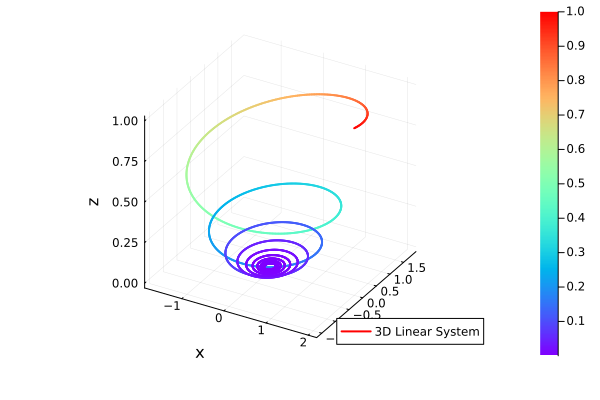

In [7]:
function linear_3d_system!(du, u, p, t)
    du[1] = -0.1u[1] - 2u[2]
    du[2] = 2u[1] - 0.1u[2]
    du[3] = -0.3u[3]
end

# Initial conditions
u0_3d_linear = [2.0, 0.0, 1.0]

# Time span
tspan = (0.0, 30.0)

# Solve ODE for three-dimensional linear system
prob_3d_linear = ODEProblem(linear_3d_system!, u0_3d_linear, tspan)
sol_3d_linear = solve(prob_3d_linear, saveat=0.01)

line_z = sol_3d_linear[3, :]
# Plot the results
plot_obj = plot(sol_3d_linear, vars=(1, 2, 3), xlabel="x", ylabel="y", zlabel="z", label="3D Linear System", linewidth=2, linecolor=:auto, color=:rainbow1, line_z=line_z)
display(plot_obj)

#### 3.2.2. Definindo e Resolvendo o Problema de Otimização

Foi utilizado a mesma função para gerar matriz $\Theta(\mathbf{X})$ que foi utilizado em 3.1.2. e além disso a mesma estrutura para resolver o problema de otimização só sendo alteradas as funções das derivadas do sistema.

In [8]:
# Obtém os valores do tempo e calcula as derivadas em relação ao tempo
t_values_3d_linear = sol_3d_linear.t
dxdt_values_3d_linear = [-0.1 * sol_3d_linear[1, i] - 2 * sol_3d_linear[2, i] for i in 1:length(t_values_3d_linear)]
dydt_values_3d_linear = [2 * sol_3d_linear[1, i] - 0.1 * sol_3d_linear[2, i] for i in 1:length(t_values_3d_linear)]
dzdt_values_3d_linear = [-0.3 * sol_3d_linear[3, i] for i in 1:length(t_values_3d_linear)]

# Obtém os valores das coordenadas espaciais
x_values_3d_linear = sol_3d_linear[1, :]
y_values_3d_linear = sol_3d_linear[2, :]
z_values_3d_linear = sol_3d_linear[3, :]

# Cria matrizes para as derivadas em relação ao tempo e as coordenadas espaciais
X_dot_3d_linear = hcat(dxdt_values_3d_linear, dydt_values_3d_linear, dzdt_values_3d_linear)
X_3d_linear = hcat(x_values_3d_linear, y_values_3d_linear, z_values_3d_linear)

# Gera a matriz de combinações polinomiais utilizando a função previamente definida
theta_matrix_3d_linear = generate_theta_3d(X_3d_linear)

# Define o parâmetro de regularização
λ = 0.1

# Cria um modelo de otimização com o otimizador Ipopt
m_3d_linear = Model(Ipopt.Optimizer)
set_optimizer_attribute(m_3d_linear, "print_level", 0)

# Define variáveis de otimização ξ_linear e t_linear
@variable(m_3d_linear, ξ_linear[1:length(theta_matrix_3d_linear[1, :]), 1:3])
@variable(m_3d_linear, t_linear[1:length(theta_matrix_3d_linear[1, :]), 1:3])

# Adiciona restrições epigráficas
@constraint(m_3d_linear, ξ_linear .<= t_linear)
@constraint(m_3d_linear, -ξ_linear .<= t_linear)

# Define a função objetivo de mínimos quadrados regularizada
@objective(m_3d_linear, Min, sum((X_dot_3d_linear - theta_matrix_3d_linear * ξ_linear).^2) + λ * sum(t_linear[i, j] for i in 1:length(theta_matrix_3d_linear[1, :]), j in 1:3))

# Otimiza o modelo
optimize!(m_3d_linear)

# Obtém os valores das variáveis de otimização ξ_linear após a otimização
ξ_values_3d_linear = value.(ξ_linear)

51×3 Matrix{Float64}:
 -0.0999005    1.9999       1.72872e-5
 -5.91231e-8  -6.16024e-8  -0.019461
 -1.54924e-5   1.34347e-5   2.25388e-5
  7.29047e-7  -1.01559e-6  -0.0185212
 -5.61599e-6   6.17122e-6  -0.000106109
  7.9604e-8    1.31636e-7  -9.793e-7
 -4.0201e-6   -3.6955e-6   -1.628e-6
  2.78976e-7   1.39655e-7   8.65387e-6
 -4.3533e-6   -5.17264e-6   8.79974e-5
 -3.91931e-6   3.94226e-6  -9.43206e-7
 -1.51508e-7   5.16436e-7  -1.82994e-6
 -4.88048e-6   5.44656e-6  -5.42967e-5
 -2.26818e-7  -1.73742e-7  -0.0331459
  ⋮                        
 -1.22033e-6  -1.07277e-6   1.28748e-6
  1.2723e-6    1.146e-6     0.00602966
 -4.30437e-7  -3.83528e-7   2.07983e-6
 -1.89357e-7  -1.35548e-7   2.85103e-6
 -1.02906e-7  -4.68352e-8   2.84885e-6
  2.25542e-7   2.12613e-7   6.34251e-6
  1.40807e-7   1.68852e-7   7.06278e-6
  8.15814e-8   1.66177e-8  -5.57755e-6
  1.23131e-7  -4.58714e-8   1.15646e-6
  1.1618e-7   -7.86887e-8   2.34127e-6
  9.95969e-8  -9.24713e-8   2.06325e-6
  8.5329e-8   -9.6442

### 3.3. Linear Damped Oscillator

#### 3.3.1. Definindo o Sistema
Inicialmente, é necessário definir o Sistema Dinâmico Linear Amortecido e gerar os pontos que serão posteriormente utilizados para o problema de otimização.

O Sistema Dinâmico Linear Amortecido é modelado pelas seguintes equações diferenciais ordinárias (EDOs):

$$
\begin{align*}
\frac{dx}{dt} &= -0.1 \cdot x - 2 \cdot y \\
\frac{dy}{dt} &= 2 \cdot x - 0.1 \cdot y \\
\end{align*}
$$

Essas equações descrevem a evolução temporal das variáveis \(x\) e \(y\). Neste sistema, não há interações não lineares entre as variáveis, resultando em um comportamento dinâmico linear.


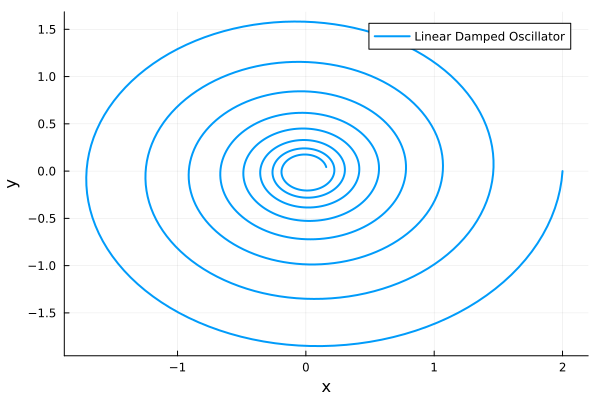

In [9]:
function linear_damped_oscillator!(du, u, p, t)
    du[1] = -0.1u[1] + 2u[2]
    du[2] = - 2u[1] - 0.1u[2]
end

# Initial conditions
u0_linear = [2.0, 0.0]

# Time span
tspan = (0.0, 25.0)

# Solve ODE for linear damped oscillator
prob_linear = ODEProblem(linear_damped_oscillator!, u0_linear, tspan)
sol_linear = solve(prob_linear)

# Plot the results
plot(sol_linear, vars=(1, 2), xlabel="x", ylabel="y", label="Linear Damped Oscillator", linewidth=2)

#### 3.3.2. Definindo o Modelo

In [10]:
using Combinatorics

function generate_theta_2d(X)
    n, p = size(X)
    combinations = []
    for i in 1:p
        push!(combinations, X[:, i])
        push!(combinations, X[:, i].^2)
        push!(combinations, X[:, i].^3)
        push!(combinations, X[:, i].^4)
        push!(combinations, X[:, i].^5)
        for j in i+1:p
            push!(combinations, X[:, i] .* X[:, j])
            push!(combinations, X[:, i].^2 .* X[:, j])
            push!(combinations, X[:, i].^3 .* X[:, j])
            push!(combinations, X[:, i].^4 .* X[:, j])
            push!(combinations, X[:, i] .* X[:, j].^2)
            push!(combinations, X[:, i] .* X[:, j].^3)
            push!(combinations, X[:, i] .* X[:, j].^4)
            push!(combinations, X[:, i].^2 .* X[:, j].^2)
            push!(combinations, X[:, i].^2 .* X[:, j].^3)
        end
    end
    return hcat(combinations...)
end

# Example usage
X = [2 3; 2 4]  # Replace x1, x2, x3 with actual values
theta_matrix = generate_theta_2d(X)

# Print the matrix
println(theta_matrix)

[2 4 8 16 32 6 12 24 48 18 54 162 36 108 3 9 27 81 243; 2 4 8 16 32 8 16 32 64 32 128 512 64 256 4 16 64 256 1024]


#### 3.3.3. Definindo e Resolvendo o Problema de Otimização

In [11]:
# Obtém os valores do tempo e calcula as derivadas em relação ao tempo
t_values_linear = sol_linear.t
dxdt_values_linear = [-0.1 * sol_linear[1, i] + 2 * sol_linear[2, i] for i in 1:length(t_values_linear)]
dydt_values_linear = [2 * sol_linear[1, i] - 0.1 * sol_linear[2, i] for i in 1:length(t_values_linear)]

# Obtém os valores das coordenadas espaciais
x_values_linear = sol_linear[1, :]
y_values_linear = sol_linear[2, :]

# Cria matrizes para as derivadas em relação ao tempo e as coordenadas espaciais
X_dot_linear = hcat(dxdt_values_linear, dydt_values_linear)
X_linear = hcat(x_values_linear, y_values_linear)

# Gera a matriz de combinações polinomiais utilizando a função previamente definida
theta_matrix_linear = generate_theta_2d(X_linear)

# Define o parâmetro de regularização
λ = 0.1

# Cria um modelo de otimização com o otimizador Ipopt
m_linear = Model(Ipopt.Optimizer)
set_optimizer_attribute(m_linear, "print_level", 0)

# Define variáveis de otimização ξ_linear e t_linear
@variable(m_linear, ξ_linear[1:size(theta_matrix_linear, 2), 1:2])
@variable(m_linear, t_linear[1:size(theta_matrix_linear, 2), 1:2])

# Adiciona restrições epigráficas
@constraint(m_linear, ξ_linear .<= t_linear)
@constraint(m_linear, -ξ_linear .<= t_linear)

# Define a função objetivo de mínimos quadrados regularizada
@objective(m_linear, Min, sum((X_dot_linear - theta_matrix_linear * ξ_linear).^2) + λ * sum(t_linear[i, j] for i in 1:size(theta_matrix_linear, 2), j in 1:2))

# Otimiza o modelo
optimize!(m_linear)

# Obtém os valores das variáveis de otimização ξ_linear após a otimização
ξ_values_linear = value.(ξ_linear)

19×2 Matrix{Float64}:
 -0.0972983     1.99729
  4.56548e-8   -4.57384e-8
 -0.000156852   0.000161777
  4.56615e-7   -4.536e-7
 -0.000149011   0.000147988
  5.21605e-8   -5.20969e-8
  3.46416e-7   -3.46277e-7
  1.10497e-7   -1.10515e-7
  0.000268903  -0.000268676
 -4.27437e-7    4.27451e-7
  1.12953e-7   -1.12609e-7
 -7.97873e-5    7.97781e-5
 -6.56875e-8    6.56413e-8
  5.71966e-7   -5.71483e-7
  1.99684      -0.0968379
  2.32734e-8   -2.32639e-8
  1.4657e-6    -1.46365e-6
  1.2168e-7    -1.21629e-7
  0.00035958   -0.000359574

### 3.4. Cubic Damped Oscillator

#### 3.4.1. Definindo o Sistema

Para iniciar, é crucial definir o Sistema Dinâmico Cúbico Amortecido e gerar os pontos que serão posteriormente utilizados para o problema de otimização.

O Sistema Dinâmico Cúbico Amortecido é modelado pelas seguintes equações diferenciais ordinárias (EDOs):

$$
\begin{align*}
\frac{dx}{dt} &= -0.1x^3 + 2y^3 \\
\frac{dy}{dt} &= -2x^3 - 0.1y^3 \\
\end{align*}
$$

Essas equações descrevem a evolução temporal das variáveis \(x\) e \(y\). Neste sistema, não há interações não lineares entre as variáveis, resultando em um comportamento dinâmico cúbico.

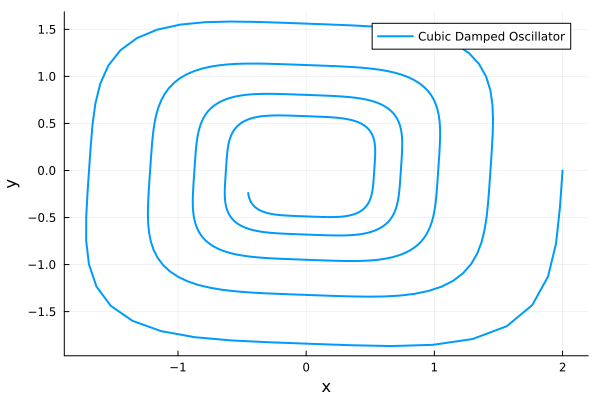

In [12]:
function cubic_damped_oscillator!(du, u, p, t)
    du[1] = -0.1u[1]^3 + 2u[2]^3
    du[2] = - 2u[1]^3 - 0.1u[2]^3
end

# Initial conditions
u0_cubic = [2.0, 0.0]

# Time span
tspan = (0.0, 25.0)

# Solve ODE for cubic damped oscillator
prob_cubic = ODEProblem(cubic_damped_oscillator!, u0_cubic, tspan)
sol_cubic = solve(prob_cubic)

# Plot the results
plot(sol_cubic, vars=(1, 2), xlabel="x", ylabel="y", label="Cubic Damped Oscillator", linewidth=2)

#### 3.4.2. Definindo e Resolvendo o Problema de Otimização

Foi utilizado a mesma função para gerar matriz $\Theta(\mathbf{X})$ que foi utilizado em 3.3.2. e além disso a mesma estrutura para resolver o problema de otimização só sendo alteradas as funções das derivadas do sistema.

In [13]:
# Obtém os valores do tempo e calcula as derivadas em relação ao tempo
t_values_cubic = sol_cubic.t
dxdt_values_cubic = [-0.1 * sol_cubic[1, i]^3 + 2 * sol_cubic[2, i]^3 for i in 1:length(t_values_cubic)]
dydt_values_cubic = [-2 * sol_cubic[1, i]^3 - 0.1 * sol_cubic[2, i]^3 for i in 1:length(t_values_cubic)]

# Obtém os valores das coordenadas espaciais
x_values_cubic = sol_cubic[1, :]
y_values_cubic = sol_cubic[2, :]

# Cria matrizes para as derivadas em relação ao tempo e as coordenadas espaciais
X_dot_cubic = hcat(dxdt_values_cubic, dydt_values_cubic)
X_cubic = hcat(x_values_cubic, y_values_cubic)

# Gera a matriz de combinações polinomiais utilizando a função previamente definida
theta_matrix_cubic = generate_theta_2d(X_cubic)

# Define o parâmetro de regularização
λ = 0.1

# Cria um modelo de otimização com o otimizador Ipopt
m_cubic = Model(Ipopt.Optimizer)
set_optimizer_attribute(m_cubic, "print_level", 0)

# Define variáveis de otimização ξ_cubic e t_cubic
@variable(m_cubic, ξ_cubic[1:size(theta_matrix_cubic, 2), 1:2])
@variable(m_cubic, t_cubic[1:size(theta_matrix_cubic, 2), 1:2])

# Adiciona restrições epigráficas
@constraint(m_cubic, ξ_cubic .<= t_cubic)
@constraint(m_cubic, -ξ_cubic .<= t_cubic)

# Define a função objetivo de mínimos quadrados regularizada
@objective(m_cubic, Min, sum((X_dot_cubic - theta_matrix_cubic * ξ_cubic).^2) + λ * sum(t_cubic[i, j] for i in 1:size(theta_matrix_cubic, 2), j in 1:2))

# Otimiza o modelo
optimize!(m_cubic)

# Obtém os valores das variáveis de otimização ξ_cubic após a otimização
ξ_values_cubic = value.(ξ_cubic)

19×2 Matrix{Float64}:
 -6.5047e-6    -7.20095e-6
  9.92401e-7    7.70992e-7
 -0.0982612    -1.99804
  6.63408e-5    9.50391e-5
 -0.00048668   -0.000559765
  2.72042e-7    4.12851e-7
  4.70067e-6   -5.07252e-6
  1.04786e-6    7.41306e-7
  0.000112573  -8.62839e-5
 -7.5965e-6    -4.39795e-6
  6.98017e-7    1.58447e-6
 -3.53241e-5   -0.000146598
 -3.30564e-7   -2.35658e-7
  0.000102278  -9.96774e-6
  9.71191e-6   -1.55244e-5
  1.2613e-6    -1.37484e-6
  1.99732      -0.0973852
  6.00843e-5   -6.96415e-5
  0.000867749  -0.000855425

## 4. Resultados e discussão ##

Neste seção, os resultados obtidos serão exibidos e discutidos. Mostre figuras, gráficos, imagens, curvas de compromisso, e o que mais puder melhor ilustrar seus resultados. A discussão deverá explicar o que significam os resultados e como interpretá-los. As limitações da sua abordagem/modelo também devem ser colocadas, bem como uma análise da sensibilidade dos resultados em relação às hipóteses feitas.


Utilize plots (veja exemplos  `PyPlot` [aqui](https://gist.github.com/gizmaa/7214002))

Aqui está um exemplo de uma tabela (em Markdown):

| Tabelas        | São           | Boas  |
| ------------- |:-------------:| -----:|
| col 3 é      | alinhado à direita |\$1600 |
| col 2 é      | centrado      |  \$12 |
| texto | também serve      |   \$1 |

### 4.A. Subseções devem ser utilizadas para organizar seu texto.

#### 4.A.a. ou até subsubseções.

## 5. Conclusão ##

Faça um resumo do que encontrou e dos seus resultados, e fale de pelo menos uma direção na qual  seu trabalho pode ser desenvolvido no futuro, algo que poderia ser interessante em decorrência do seu projeto.


## 6. Referências bibliográficas ##

[1] Brunton, S. L., Proctor, J. L., & Kutz, J. N. (2016). *Descoberta de equações governantes a partir de dados por identificação esparsa de sistemas dinâmicos não lineares.* *Proceedings of the National Academy of Sciences*, 113(15), 3932-3937. DOI: [10.1073/pnas.1517384113](https://doi.org/10.1073/pnas.1517384113)

[2] Brunton, S. L., Proctor, J. L., & Kutz, J. N. (2016). *Descoberta de equações governantes a partir de dados: Identificação esparsa de sistemas dinâmicos não lineares - Informações de suporte.* *Proceedings of the National Academy of Sciences*, 113(15), 3932-3937. DOI: [10.1073/pnas.1517384113](https://doi.org/10.1073/pnas.1517384113)

[3] Brunton, S. (2023). *Physics Informed Machine Learning Playlist.* [YouTube Playlist](https://www.youtube.com/playlist?list=PLMrJAkhIeNNQ0BaKuBKY43k4xMo6NSbBa). Última atualização em 31 de mar. de 2023.
